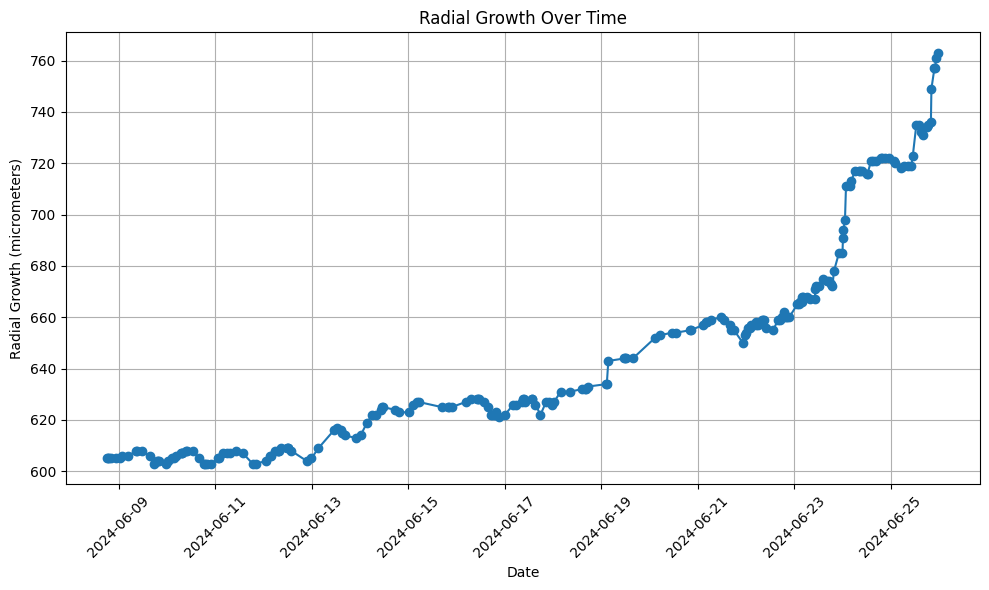

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("/content/BanderLog_92221410 - Sheet1.csv")

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%dT%H:%M:%SZ')

# Plot radial growth over time
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['radial growth'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Radial Growth (micrometers)')
plt.title('Radial Growth Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


Correlation between temperature and radial growth: -0.14103219516311777


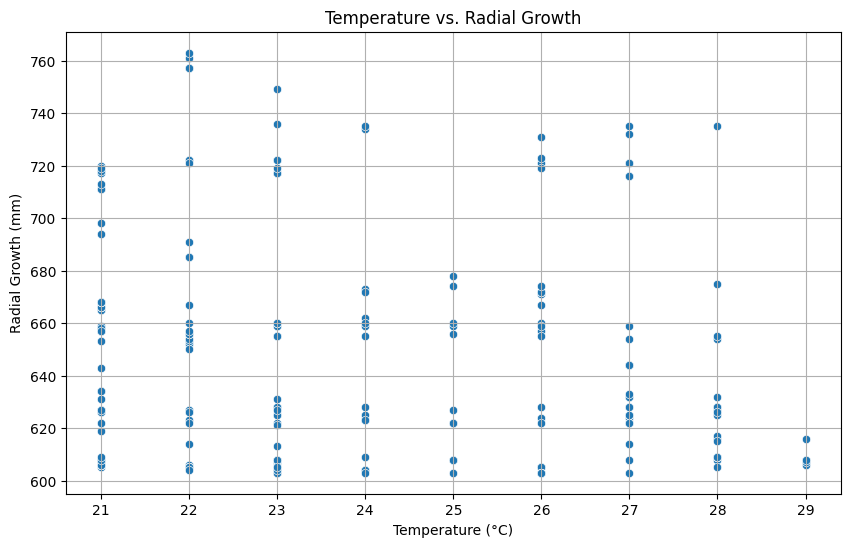

In [ ]:
import seaborn as sns

# Calculate the correlation coefficient
correlation = data['temp'].corr(data['radial growth'])
print(f'Correlation between temperature and radial growth: {correlation}')

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['temp'], y=data['radial growth'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Radial Growth (mm)')
plt.title('Temperature vs. Radial Growth')
plt.grid(True)
plt.show()


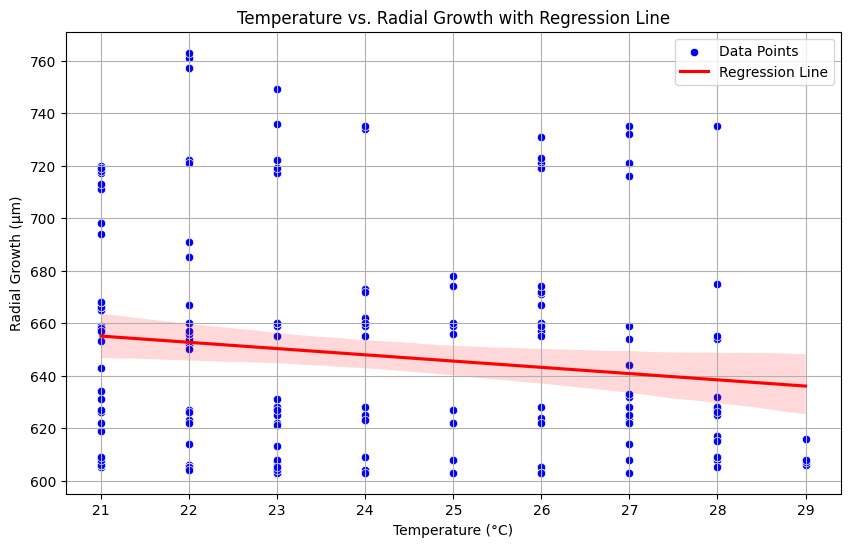

In [ ]:
# Convert the timestamp to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Extract temperature and radial growth columns
temperature = data['temp']
radial_growth = data['radial growth']

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=temperature, y=radial_growth, color='blue', label='Data Points')
sns.regplot(x=temperature, y=radial_growth, scatter=False, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Radial Growth (µm)')
plt.title('Temperature vs. Radial Growth with Regression Line')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

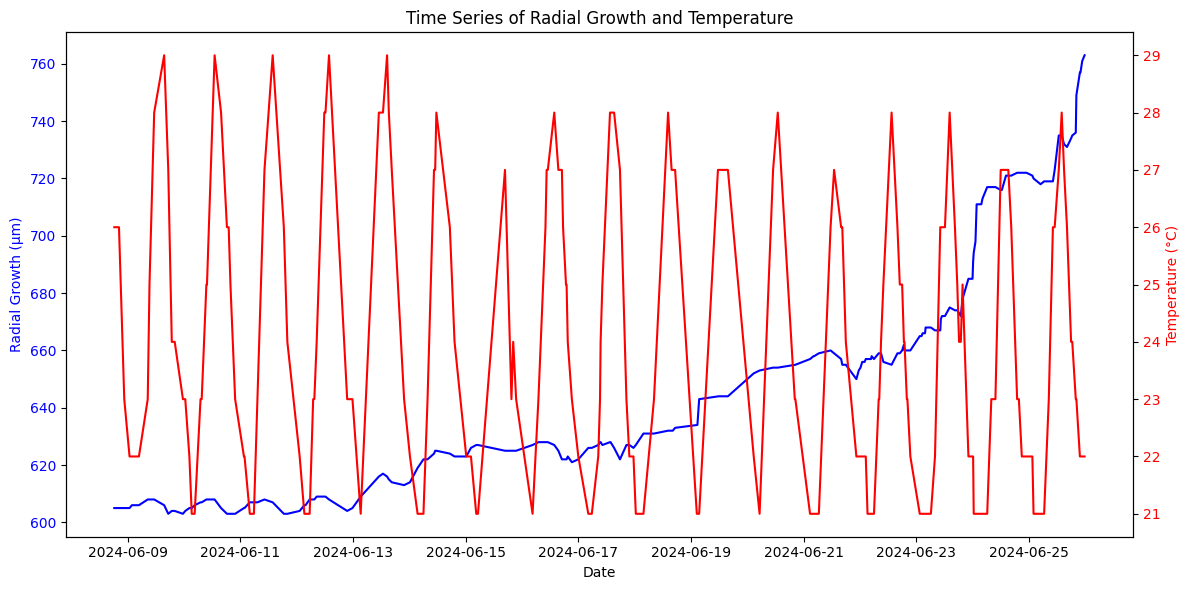

In [ ]:
# Convert the timestamp to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Set the date column as the index
data.set_index('date', inplace=True)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the radial growth on the primary y-axis
ax1.plot(data.index, data['radial growth'], color='blue', label='Radial Growth')
ax1.set_xlabel('Date')
ax1.set_ylabel('Radial Growth (µm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(data.index, data['temp'], color='red', label='Temperature')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and a legend
plt.title('Time Series of Radial Growth and Temperature')
fig.tight_layout()

# Show the plot
plt.show()

DataFrame Head:
  site          tree        ID  longitude  lattitude  elevation  \
0  mys  Melia dubia   92221410  12.127099  76.619579     3141.6   
1  mys  Melia dubia   92221410  12.127099  76.619580     3141.6   
2  mys  Melia dubia   92221410  12.127099  76.619581     3141.6   
3  mys  Melia dubia   92221410  12.127099  76.619582     3141.6   
4  mys  Melia dubia   92221410  12.127099  76.619583     3141.6   

                   date  temp  radial growth   dbh  
0  2024-06-08T18:15:00Z    26            605  25.8  
1  2024-06-08T18:30:00Z    26            605  25.8  
2  2024-06-08T19:15:00Z    26            605  25.8  
3  2024-06-08T20:15:00Z    26            605  25.8  
4  2024-06-08T22:30:00Z    23            605  25.8  

Column Names:
Index(['site', 'tree', 'ID', 'longitude', 'lattitude', 'elevation', 'date',
       'temp', 'radial growth', 'dbh'],
      dtype='object')


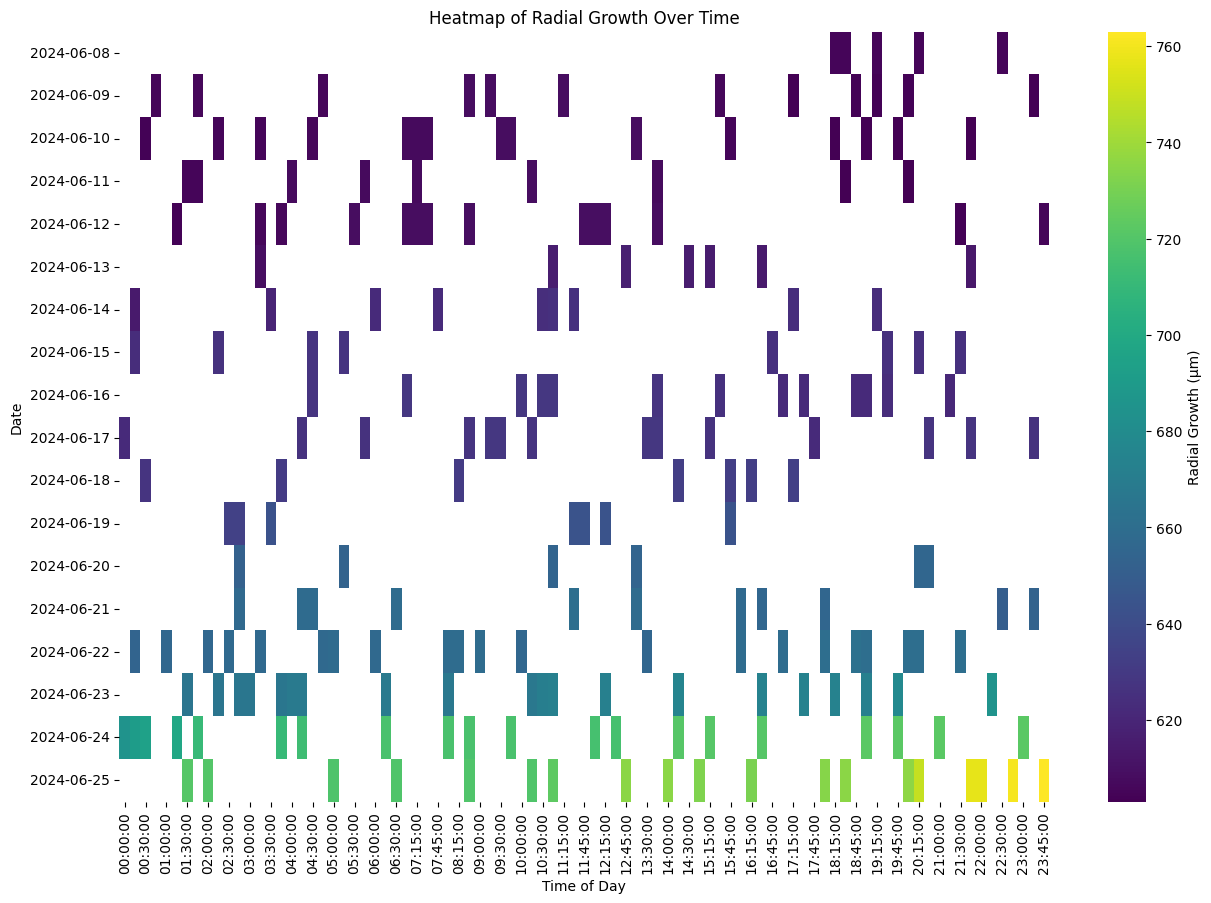

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data from CSV file
data = pd.read_csv("/content/BanderLog_92221410 - Sheet1.csv")

# Display the first few rows of the dataframe and column names for debugging
print("DataFrame Head:")
print(data.head())
print("\nColumn Names:")
print(data.columns)

# Check if 'date' column exists and convert it to datetime
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
else:
    print("Error: 'date' column not found in the dataset.")
    exit()

# Extract the date and time of day from the 'date' column
data['day'] = data['date'].dt.date
data['time_of_day'] = data['date'].dt.strftime('%H:%M:%S')

# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = data.pivot(index='day', columns='time_of_day', values='radial growth')

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Radial Growth (µm)'})
plt.title('Heatmap of Radial Growth Over Time')
plt.xlabel('Time of Day')
plt.ylabel('Date')
plt.xticks(rotation=90)
plt.show()

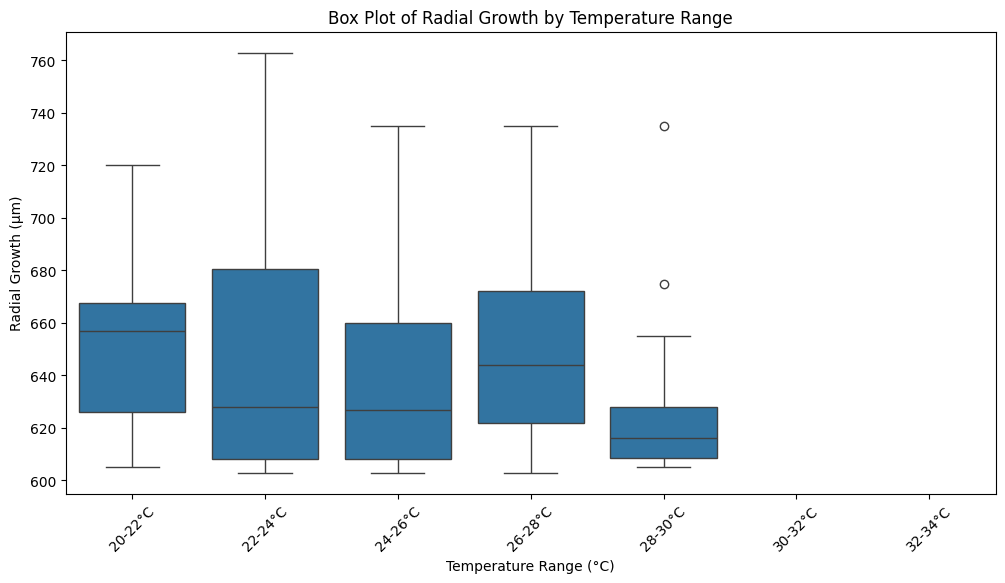

In [ ]:
# Check if 'temp' and 'radial growth' columns exist
if 'temp' in data.columns and 'radial growth' in data.columns:
    # Define temperature bins
    bins = [20, 22, 24, 26, 28, 30, 32, 34]
    labels = ['20-22°C', '22-24°C', '24-26°C', '26-28°C', '28-30°C', '30-32°C', '32-34°C']

    # Create temperature bins
    data['temp_range'] = pd.cut(data['temp'], bins=bins, labels=labels, right=False)

    # Plot the box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='temp_range', y='radial growth', data=data)
    plt.title('Box Plot of Radial Growth by Temperature Range')
    plt.xlabel('Temperature Range (°C)')
    plt.ylabel('Radial Growth (µm)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Error: 'temp' or 'radial growth' column not found in the dataset.")
    exit()

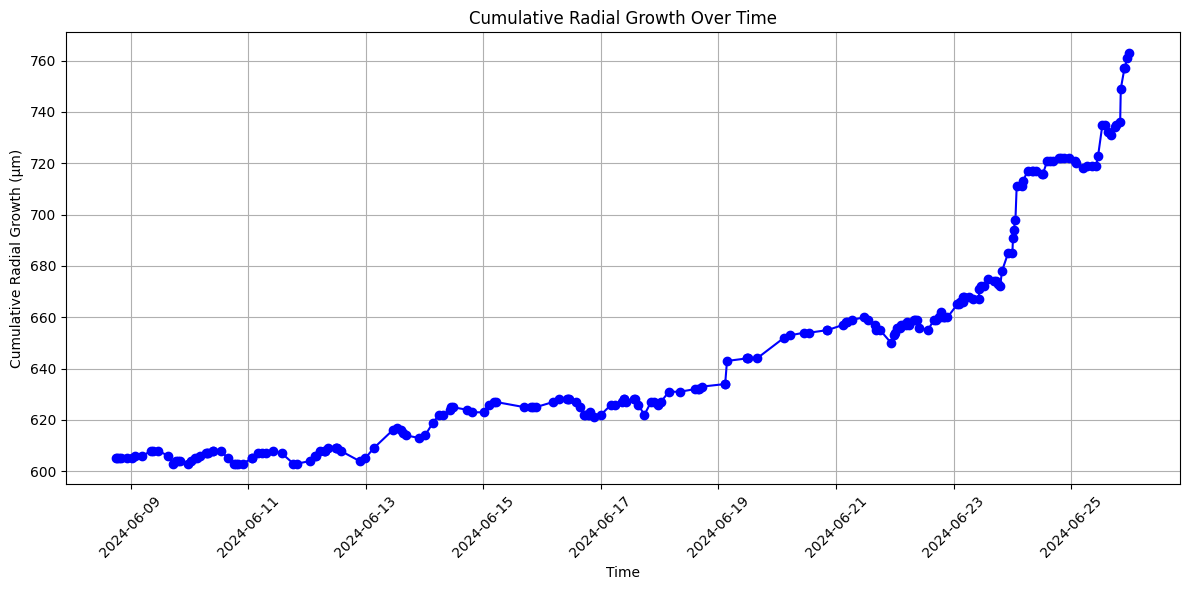

In [ ]:
# Calculate cumulative radial growth over time
data['cumulative_growth'] = data.groupby('date')['radial growth'].cumsum()

# Plot cumulative growth
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['cumulative_growth'], marker='o', linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('Cumulative Radial Growth (µm)')
plt.title('Cumulative Radial Growth Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

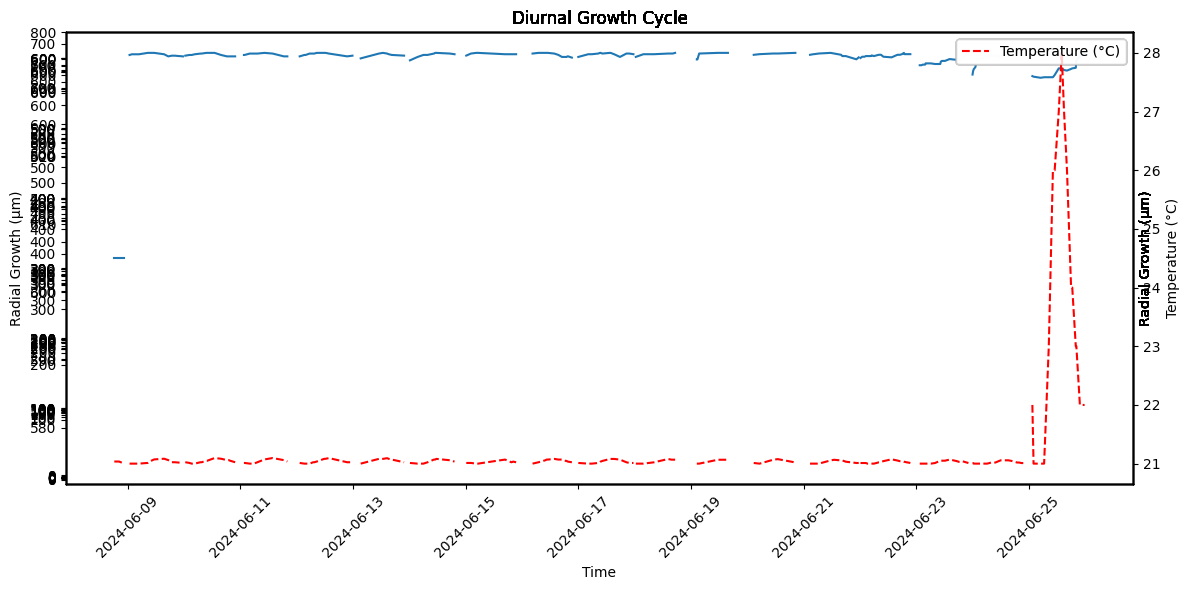

In [ ]:
# Convert 'date' column to datetime if not already
data['date'] = pd.to_datetime(data['date'])

# Extract date for grouping
data['date_only'] = data['date'].dt.date

# Plotting diurnal growth cycle for each day
plt.figure(figsize=(12, 6))

# Group by date and iterate over groups
for date, group in data.groupby('date_only'):
    plt.plot(group['date'], group['radial growth'], label=str(date))
    plt.xlabel('Time')
    plt.ylabel('Radial Growth (µm)')
    plt.title('Diurnal Growth Cycle')
    plt.xticks(rotation=45)
    plt.twinx()
    plt.plot(group['date'], group['temp'], 'r--', label='Temperature (°C)')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data from CSV file
data = pd.read_csv("/content/BanderLog_92221410 - Sheet1.csv")

# Display the first few rows of the dataframe and column names for debugging
print("DataFrame Head:")
print(data.head())
print("\nColumn Names:")
print(data.columns)

DataFrame Head:
  site          tree        ID  longitude  lattitude  elevation  \
0  mys  Melia dubia   92221410  12.127099  76.619579     3141.6   
1  mys  Melia dubia   92221410  12.127099  76.619580     3141.6   
2  mys  Melia dubia   92221410  12.127099  76.619581     3141.6   
3  mys  Melia dubia   92221410  12.127099  76.619582     3141.6   
4  mys  Melia dubia   92221410  12.127099  76.619583     3141.6   

                   date  temp  radial growth   dbh  
0  2024-06-08T18:15:00Z    26            605  25.8  
1  2024-06-08T18:30:00Z    26            605  25.8  
2  2024-06-08T19:15:00Z    26            605  25.8  
3  2024-06-08T20:15:00Z    26            605  25.8  
4  2024-06-08T22:30:00Z    23            605  25.8  

Column Names:
Index(['site', 'tree', 'ID', 'longitude', 'lattitude', 'elevation', 'date',
       'temp', 'radial growth', 'dbh'],
      dtype='object')
